In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

d:\Works\Projects\ML\ml-env\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)


Training shape: (60000, 28, 28)
Testing shape: (10000, 28, 28)


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

**Build ANN Model**

In [7]:
model = keras.Sequential([
    
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(10, activation='softmax')
])

d:\Works\Projects\ML\ml-env\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [10]:
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8936 - loss: 0.3465 - val_accuracy: 0.9567 - val_loss: 0.1391
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9478 - loss: 0.1723 - val_accuracy: 0.9654 - val_loss: 0.1139
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9578 - loss: 0.1368 - val_accuracy: 0.9693 - val_loss: 0.0994
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9632 - loss: 0.1181 - val_accuracy: 0.9750 - val_loss: 0.0838
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9679 - loss: 0.1025 - val_accuracy: 0.9751 - val_loss: 0.0825
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9698 - loss: 0.0958 - val_accuracy: 0.9756 - val_loss: 0.0794
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9721 - loss: 0.0875 - val_accuracy: 0.9777 - val_loss: 0.0759
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9750 - loss: 0.0789 - val_accuracy

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9817 - loss: 0.0602
Test Accuracy: 0.9817000031471252


📊 Plot Graph

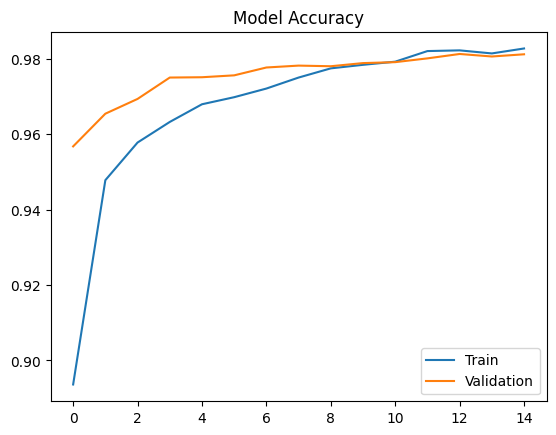

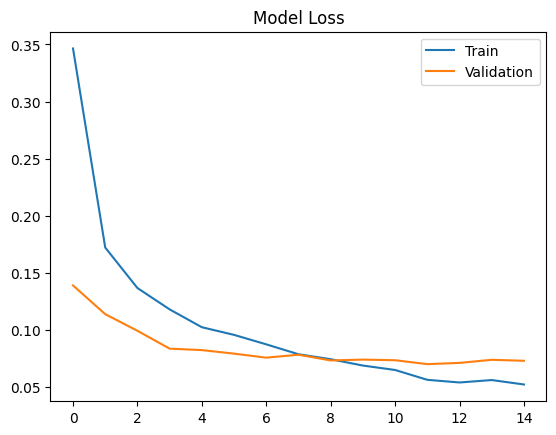

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'])
plt.show()